In [2]:
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

#loading data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

#data cleaning
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [3]:
#filtering the data
df_DA_CZ = df[(df['job_title_short']=='Data Analyst')&(df['job_country']=='Czechia')].copy()
df_DA_SK = df[(df['job_title_short']=='Data Analyst')&(df['job_country']=='Slovakia')].copy()

In [4]:
#replacing inconsistent values
df_DA_CZ['job_location'] = df_DA_CZ['job_location'].replace({'Czechia': 'Czechia Remote', 'Anywhere': 'Czechia Remote'})
df_DA_SK['job_location'] = df_DA_SK['job_location'].replace({'Slovakia': 'Slovakia Remote', 'Anywhere': 'Slovakia Remote'})

In [5]:
#concatinating the dataframes
df_DA_CZSK = pd.concat([df_DA_CZ, df_DA_SK], ignore_index=True)

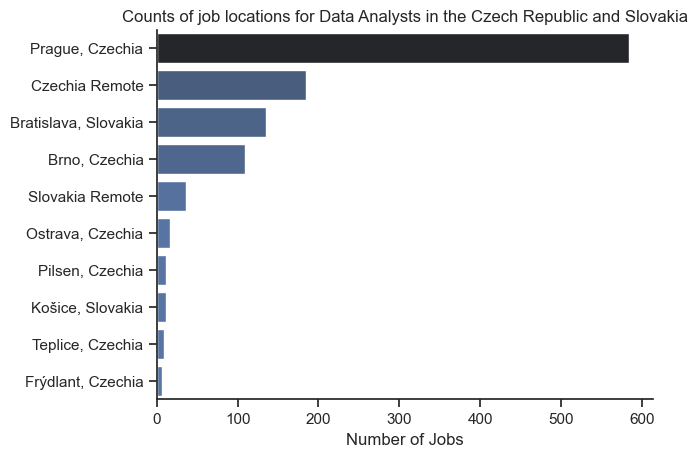

In [6]:
df_plot = df_DA_CZSK['job_location'].value_counts().head(10).to_frame()
sns.set_theme(style='ticks')

sns.barplot(data=df_plot, x='count', y='job_location', hue='count', palette='dark:b_r',legend=False)
sns.despine()

plt.xlabel('Number of Jobs')
plt.title('Counts of job locations for Data Analysts in the Czech Republic and Slovakia')
plt.ylabel('')
plt.show()

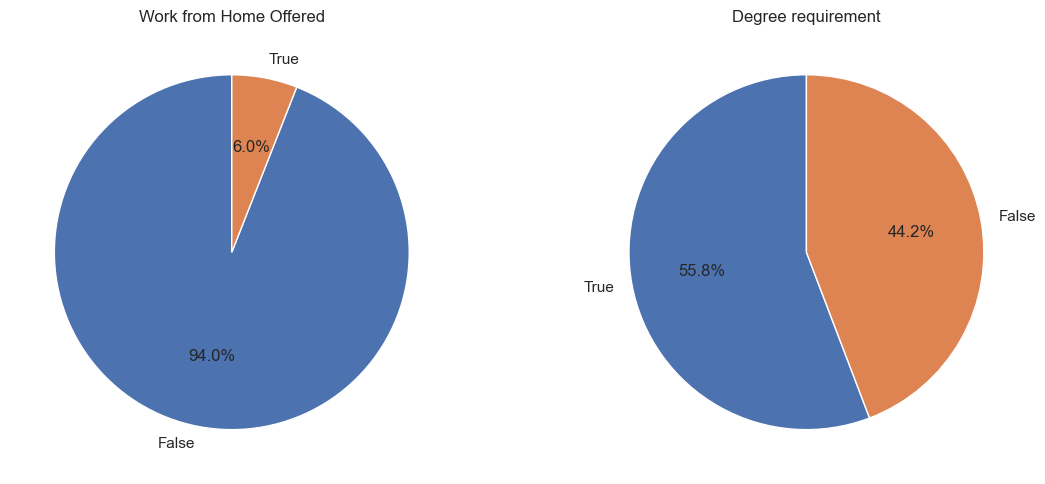

In [7]:
dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree requirement'
}

fig, ax = plt.subplots(1, 2)
fig.set_size_inches((12, 5))

for i, (column, title) in enumerate(dict_column.items()):
    value_counts = df_DA_CZSK[column].value_counts()
    ax[i].pie(value_counts, labels=value_counts.index.astype(str), autopct='%1.1f%%', startangle=90)
    ax[i].set_title(title)

plt.tight_layout()
plt.show()

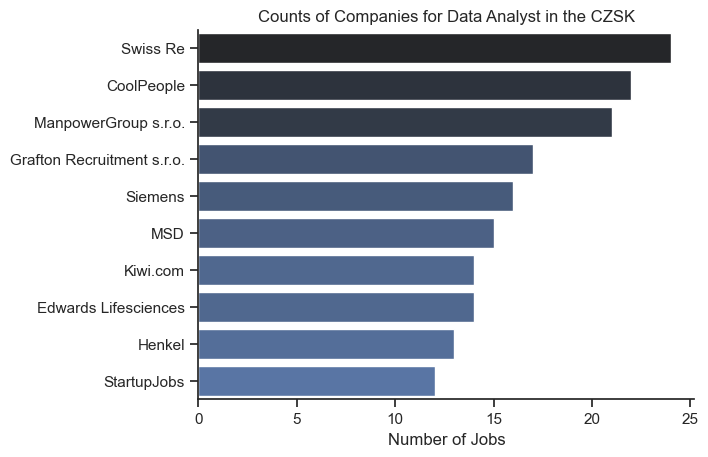

In [8]:
df_plot = df_DA_CZSK['company_name'].value_counts().head(10).to_frame()
sns.set_theme(style='ticks')

sns.barplot(data=df_plot, x='count', y='company_name', hue='count', palette='dark:b_r',legend=False)
sns.despine()

plt.xlabel('Number of Jobs')
plt.title('Counts of Companies for Data Analyst in the CZSK')
plt.ylabel('')
plt.show()